# Example how to visualize the data. This should hopefully help you understand the form of the data
## Other important information about the extracted features of the data can be found in the features_info.txt and features.txt files in the UCI_HAR folder

In [1]:
# Import Necessary packages
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn as sk
import sys
print('Your python version: {}'.format(sys.version_info.major))



#Path to the dataset folder
filepath='./UCI_HAR/'

groups=['train','test']

for group in groups:
    prefix=filepath+group+'/InertialSignals/'
    
    
    filenames = list()
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']

    loaded = []
    for name in filenames:
        file=open(prefix+name,'r')
        data = []
        for x in file:
            data.append([float(ts) for ts in x.split()])
        data = np.array(data)
        #Concatenation of all data concerning the two 3D raw features (body acceleration and angular velocity)
        loaded.append(data)

    #Name of the last 3D raw feature
    filenames_rest = ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']

    #First add the two previous 3D raw features
    loaded_all = []
    loaded_all += loaded

    #Then add the last 3D raw feature
    for name in filenames_rest:
        file=open(prefix+name,'r')
        data = []
        for x in file:
            data.append([float(ts) for ts in x.split()])
        data = np.array(data)
        #Concatenation of all data concerning all 3D raw features (body acceleration, angular velocity and total acceleration)
        loaded_all.append(data)

    # Stack group so that features are the 3rd dimension --> (samples, time steps, features)
    loaded = np.dstack(loaded)
    loaded_all = np.dstack(loaded_all)

    if group == 'train':
        #Training set for two 3D raw features
        tx_train = loaded
        #Training set for all 3D raw features
        tx_train_all = loaded_all
    if group =='test':
        #Testing set for two 3D raw features
        tx_test = loaded
        #Testing set for all 3D raw features
        tx_test_all = loaded_all

nbTimeseries = tx_train_all[0].shape[1]
lengthTimeseries = tx_train_all[0].shape[0]
print("Shape of examples:",tx_train_all[0].shape," (i.e. ",nbTimeseries," timeseries of length=",lengthTimeseries,")")

print("Training set shape:",tx_train_all.shape)
print("Test set shape:",tx_test_all.shape)

# Load labels
y_train = []
y_test = []
y_train_file = open(filepath+'train/y_train.txt', 'r')
y_test_file = open(filepath+'test/y_test.txt', 'r')
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
target_train = np.array(y_train) - 1
target_test = np.array(y_test) - 1

# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

nbClasses = len(labels)
print("Number of classes =", nbClasses)
print("Activity classes (target values)",labels)

# Shuffle (because data is initially somewhat organized by class)
tx_train_all, target_train = sk.utils.shuffle(tx_train_all, target_train, random_state=0)
tx_test_all, target_test = sk.utils.shuffle(tx_test_all, target_test, random_state=0)


Your python version: 3
Shape of examples: (128, 9)  (i.e.  9  timeseries of length= 128 )
Training set shape: (7352, 128, 9)
Test set shape: (2947, 128, 9)
Number of classes = 6
Activity classes (target values) {1: 'WALKING', 2: 'WALKING UPSTAIRS', 3: 'WALKING DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


In [4]:
tx_train_all[0], target_train[0]

(array([[-1.241386e-02,  2.280830e-05,  3.035962e-03, ...,  1.195274e-01,
         -4.310865e-01,  8.970326e-01],
        [-1.005539e-02,  1.582812e-03,  2.471379e-03, ...,  1.219243e-01,
         -4.294974e-01,  8.964639e-01],
        [-1.103572e-02,  3.143848e-03,  1.501829e-03, ...,  1.209758e-01,
         -4.279063e-01,  8.954916e-01],
        ...,
        [ 6.834282e-03,  2.807625e-03, -1.626423e-03, ...,  1.341766e-01,
         -4.257383e-01,  8.922664e-01],
        [ 9.543704e-03,  2.766475e-04, -1.130635e-03, ...,  1.370384e-01,
         -4.283859e-01,  8.927086e-01],
        [ 9.636414e-03, -3.729947e-03, -8.962312e-05, ...,  1.372848e-01,
         -4.325093e-01,  8.936954e-01]]),
 5)


 body acceleration [ba_x, ba_y, ba_z]=f(time) for example #0


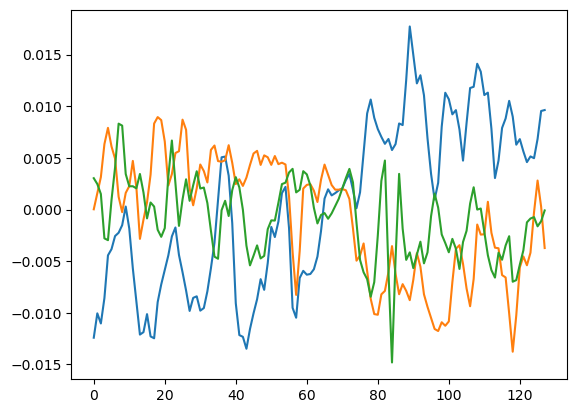


 body acceleration [ba_x, ba_y, ba_z]=f(time) for example #1


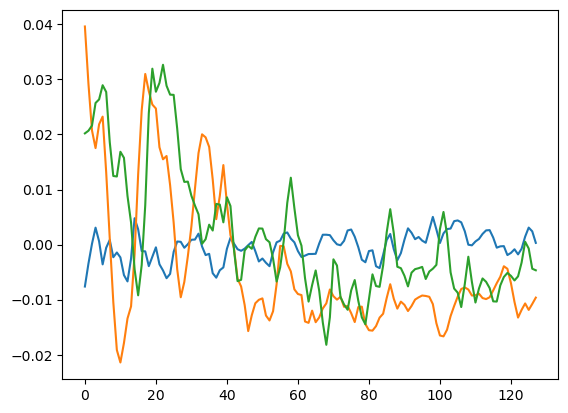


 body acceleration [ba_x, ba_y, ba_z]=f(time) for example #160


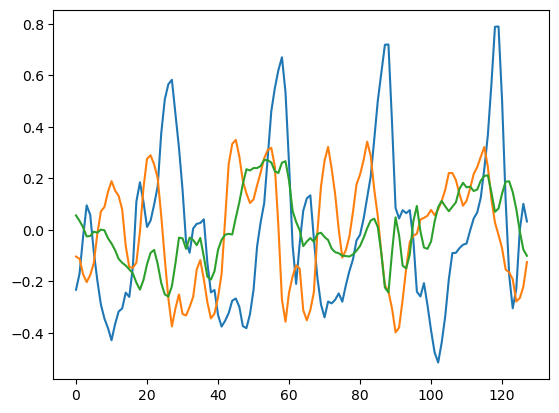


 body_gyro [bg_x, bg_y, bg_z]=f(time) for example #0


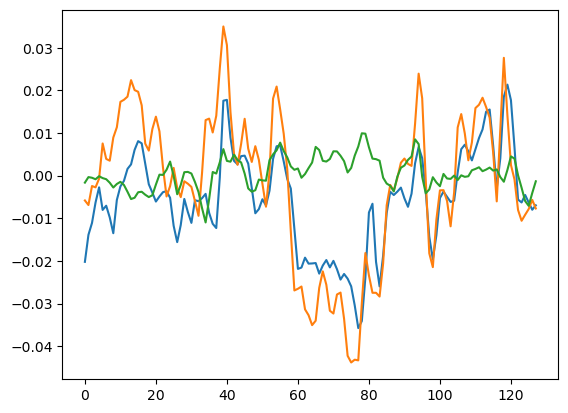


 body_gyro [bg_x, bg_y, bg_z]=f(time) for example #1


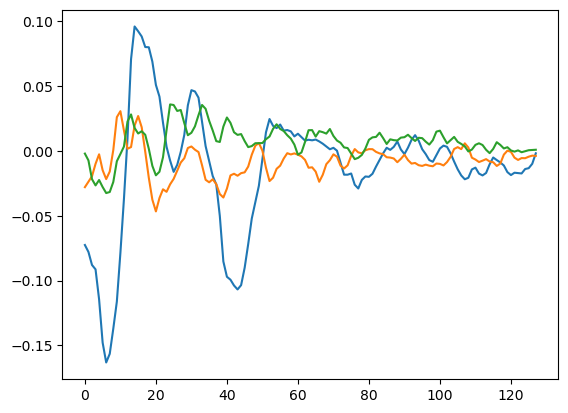


 body_gyro [bg_x, bg_y, bg_z]=f(time) for example #160


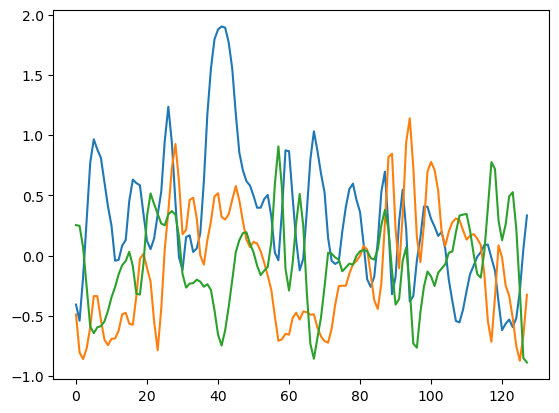


 ALL 9 channels of example #0 which has classID=LAYING


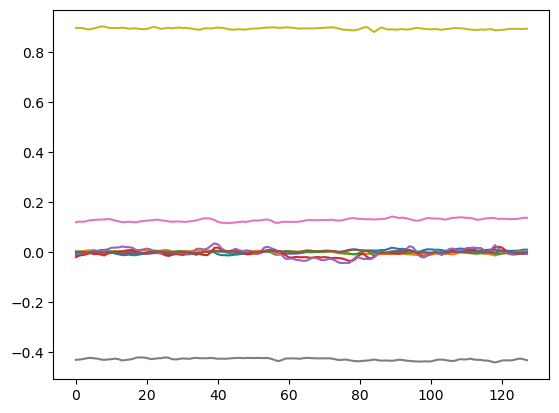


 ALL 9 channels of example #1 which has classID=STANDING


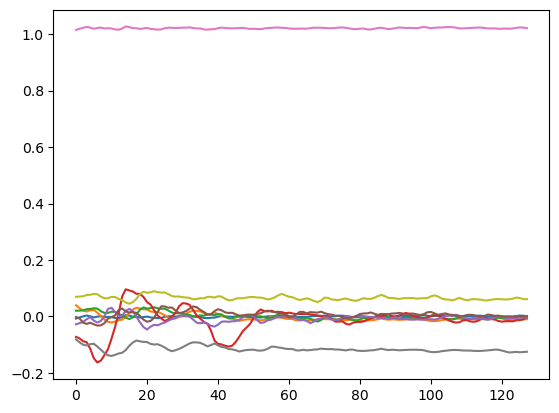


 ALL 9 channels of example #160 which has classID=WALKING UPSTAIRS


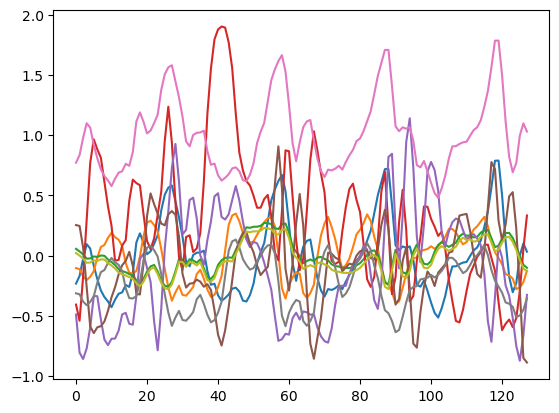

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

ex0 = tx_train_all[0].T # Transpose (for selection of body_acc variables)
ex0_body_acc = np.array([ex0[0] , ex0[1], ex0[2]])
ex0_body_acc = ex0_body_acc.T # Transpose back (for plotting)
ex0_body_gyro = np.array([ex0[3] , ex0[4], ex0[5]])
ex0_body_gyro = ex0_body_gyro.T # Transpose back (for plotting)
print("\n body acceleration [ba_x, ba_y, ba_z]=f(time) for example #0")
plt.plot(ex0_body_acc)
plt.show()

ex1 = tx_train_all[1].T # Transpose (for selection of body_acc variables))
ex1_body_acc = np.array([ex1[0] , ex1[1], ex1[2]])
ex1_body_acc = ex1_body_acc.T # Transpose back (for plotting)
ex1_body_gyro = np.array([ex1[3] , ex1[4], ex1[5]])
ex1_body_gyro = ex1_body_gyro.T # Transpose back (for plotting)
print("\n body acceleration [ba_x, ba_y, ba_z]=f(time) for example #1")
plt.plot(ex1_body_acc)
plt.show()

ex160 = tx_train_all[160].T # Transpose (for selection of body_acc variables))
ex160_body_acc = np.array([ex160[0] , ex160[1], ex160[2]])
ex160_body_acc = ex160_body_acc.T # Transpose back (for plotting)
ex160_body_gyro = np.array([ex160[3] , ex160[4], ex160[5]])
ex160_body_gyro = ex160_body_gyro.T # Transpose back (for plotting)
print("\n body acceleration [ba_x, ba_y, ba_z]=f(time) for example #160")
plt.plot(ex160_body_acc)
plt.show()

print("\n body_gyro [bg_x, bg_y, bg_z]=f(time) for example #0")
plt.plot(ex0_body_gyro)
plt.show()
print("\n body_gyro [bg_x, bg_y, bg_z]=f(time) for example #1")
plt.plot(ex1_body_gyro)
plt.show()
print("\n body_gyro [bg_x, bg_y, bg_z]=f(time) for example #160")
plt.plot(ex160_body_gyro)
plt.show()

print("\n ALL 9 channels of example #0 which has classID="+labels[target_train[0]+1])
plt.plot(tx_train_all[0])
plt.show()

print("\n ALL 9 channels of example #1 which has classID="+labels[target_train[1]+1])
plt.plot(tx_train_all[1])
plt.show()

print("\n ALL 9 channels of example #160 which has classID="+labels[target_train[160]+1])
plt.plot(tx_train_all[160])
plt.show()

